<a href="https://colab.research.google.com/github/AndrewCrossman/Phys824/blob/main/kwant_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install kwant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 31.7 MB/s 
  Created wheel for kwant: filename=kwant-1.4.3-cp37-cp37m-linux_x86_64.whl size=3691061 sha256=344d75a7b0308a1662fbe1125ee313c554121ba7872ed850b99d335dc3848986
  Stored in directory: /root/.cache/pip/wheels/d6/2d/93/6f395cd3f0798d7d9e161dce1c8b8c8bbd04d4547763c926de
  Created wheel for tinyarray: filename=tinyarray-1.2.4-cp37-cp37m-linux_x86_64.whl size=227984 sha256=249b32d03c5e2f62975855d0ab418138c6f5f38c7bcad8c3fed779d40739a847
  Stored in directory: /root/.cache/pip/wheels/85/c6/1c/6939e2931cfbff5df75758a06084bf67171b640ebdf5febd35
Successfully built kwant tinyarray


In [3]:
import kwant

/usr/local/lib/python3.7/dist-packages/kwant/solvers/default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [4]:
def billiard(pos):
  x,y = pos
  return x*x + y*y < 100*100

In [ ]:
def billiard2(pos):
  x,y = pos
  x = max(abs(x)-70,0)
  return x*x + y*y < 100*100

In [8]:
sys = kwant.Builder()
lat = kwant.lattice.square()
sys[lat.shape(billiard, (0,0))] = 4
sys[lat.neighbors()] = -1

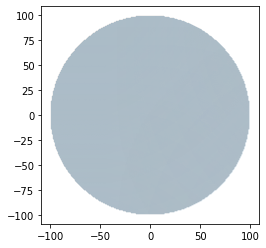

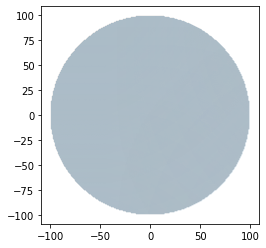

In [9]:
kwant.plot(sys)

In [10]:
lead = kwant.Builder(kwant.TranslationalSymmetry([-1,0]))
lead[(lat(0,y) for y in range(30,60))] = 4
lead[lat.neighbors()] = -1
sys.attach_lead(lead);

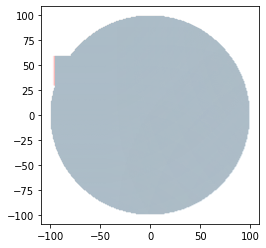

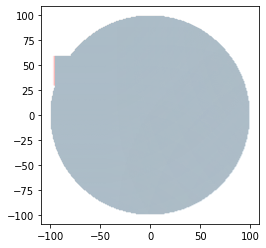

In [11]:
kwant.plot(sys)

In [12]:
sys = sys.finalized()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: The plotted data contains 1.35% of values overflowing upper limit 0.159784 
  


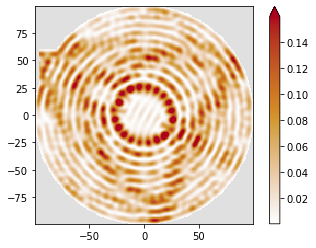

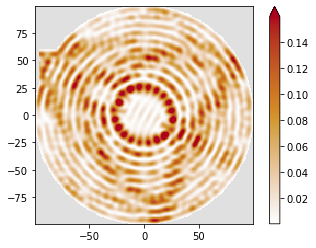

In [13]:
# local density of states
ldos = kwant.ldos(sys, 0.2)
kwant.plotter.map(sys,ldos)